In [5]:
idd = taxi_data['Taxi ID'].value_counts().reset_index()

In [24]:
len(idd)

4102

In [12]:
idd['unique_id'] = idd.index
idd['unique_id'] = idd['unique_id'].apply(lambda x : 't'+str(x))
idd.columns = ['Taxi ID','count','unique_id']

In [75]:
data_merge = taxi_data[['Trip ID', u'Taxi ID', u'Trip Seconds', u'Trip Miles','Fare','Trip Total','Company',\
                        u'month', u'date', u'hr']].merge(idd)
print len(data_merge)
len(data_merge.unique_id.value_counts())

1071556


4102

In [92]:
# data_id = data_merge.loc[data_merge['count'] > 50]
data_id = data_merge
print len(data_id)

1071556


### avg trips per day

In [93]:
test = data_id[['Fare','unique_id','date']].groupby(['unique_id','date']).count().reset_index()
avg_trip = test[['unique_id','Fare']].groupby(['unique_id']).mean().reset_index()

test = data_id[['Fare','unique_id','date']].groupby(['unique_id','date']).sum().reset_index()
avg_fare = test[['unique_id','Fare']].groupby(['unique_id']).mean().reset_index()

test = data_id[['Trip Miles','unique_id','date']].groupby(['unique_id','date']).sum().reset_index()
avg_mile = test[['unique_id','Trip Miles']].groupby(['unique_id']).mean().reset_index()

test = data_id[['Trip Seconds','unique_id','date']].groupby(['unique_id','date']).sum().reset_index()
avg_sec = test[['unique_id','Trip Seconds']].groupby(['unique_id']).mean().reset_index()
avg_sec['minute'] = avg_sec['Trip Seconds'] / 60

In [95]:
avg_sec['minute'].describe()

count    4102.000000
mean      118.718865
std        74.299142
min         0.000000
25%        85.485000
50%       127.660256
75%       163.078461
max       792.608333
Name: minute, dtype: float64

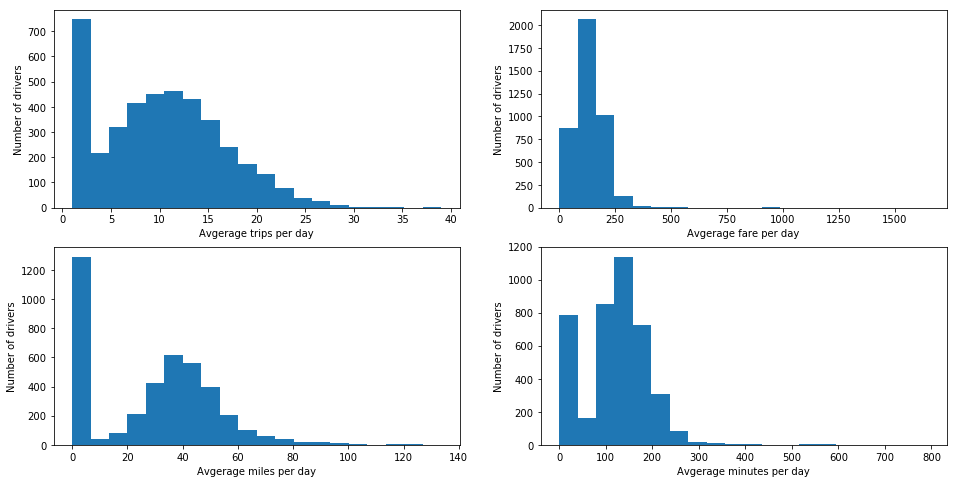

In [94]:
fig = plt.figure(figsize=(16, 8)) 
plt.subplot(2, 2, 1)
plt.hist(avg_trip.Fare,20)
plt.xlabel('Avgerage trips per day')
plt.ylabel('Number of drivers')

plt.subplot(2, 2, 2)
plt.hist(avg_fare.Fare,20)
plt.xlabel('Avgerage fare per day')
plt.ylabel('Number of drivers')

plt.subplot(2, 2, 3)
plt.hist(avg_mile['Trip Miles'],20)
plt.xlabel('Avgerage miles per day')
plt.ylabel('Number of drivers')

plt.subplot(2, 2, 4)
plt.hist(avg_sec.minute,20)
plt.xlabel('Avgerage minutes per day')
plt.ylabel('Number of drivers')